In [ ]:
!tar -zxvf dataset_roboflow.tar.gz && tar -zxvf dataset_sketch_it.tar.gz

In [2]:
new_dataset_path='./new_dataset/'


In [3]:
import numpy as np
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color



# from keras_retinanet import models/
# from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
# from keras_retinanet.utils.visualization import draw_box, draw_caption
# from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()


RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)


In [4]:
THRES_SCORE = 0.4

def draw_detections(image, box, scores=0, label=''):
#   for box, score, label in zip(boxes[0], scores[0], labels[0]):
#     if score < THRES_SCORE:
#         continue

#     color = label_color(labels)

#     box = box.astype(int)
    
    draw_box(image, box, color=(0,255,0) )

    caption = "{} {:.3f}".format(label, 0)
    draw_caption(image, box, caption)
    
    
    

def show_detected_objects(image_row,img_folder=''):
    
    img_path = img_folder+image_row.image_name
    true_box = [
        image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max]
    image = read_image_bgr(img_path)

    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    image = preprocess_image(image)
    image, scale = resize_image(image)

#     boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis = 0))
#     print('scale',scale)
#     print('scores',scores)
#     print('labels',labels)
#     print('image',image)

#     boxes /= scale
#     print('boxes',boxes[0])

    draw_box(draw, true_box, color=(255, 0, 0))
    draw_detections(image, box=true_box, label= labels_to_name)
    
#     caption = "{} {:.3f}".format(image_row.class_name,0)
#     draw_caption(image,true_box , image_row.class_name)

    plt.axis('off')
    plt.imshow(draw)
    plt.show()

In [5]:
roboflow = pd.read_csv('dataset_roboflow/new_train/annotations.csv')
sketch_it = pd.read_csv('dataset_sketch_it/images/annotations.csv')

In [ ]:
roboflow

In [ ]:
sketch_it

In [6]:
new_dataset = roboflow.append(sketch_it,ignore_index=True)
new_dataset

/tmp/ipykernel_31054/2169078318.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataset = roboflow.append(sketch_it,ignore_index=True)


,image_name,width,height,class_name,x_min,y_min,x_max,y_max
0,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,95,98,345,157
1,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,102,244,342,309
2,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Button,106,542,372,614
3,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,12,160,139,400
4,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,191,151,306,395
...,...,...,...,...,...,...,...,...
6578,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,453,628,645,678
6579,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,133,734,369,855
6580,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,300,204,1072,478
6581,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,752,639,983,679


In [7]:
import shutil
from PIL import Image
import cv2
import imghdr

def copy2dri(df,destination,fromDir=[]):

    print(destination)

    for i in df.image_name: 


    #     create dir
        if not os.path.exists(destination):
            os.makedirs(destination)

        for Dir in fromDir:
#             print(f'{Dir+i} -')
            
            if os.path.exists(Dir+i):
                pli_img = Image.open(Dir+i)  
                cv_img = cv2.imread(Dir+i)

#                 print(f'{Dir+i} - {pli_img.format}')
        #         cv2.imwrite(destination+'/'+i, cv_img, [int(cv2.IMWRITE_JPEG_QUALITY), 100])  
                shutil.copy2(Dir+i,destination)


    df.to_csv(destination+'/annotations.csv',index=False)      

    return 'done'

In [8]:

copy2dri(destination=new_dataset_path,df= new_dataset,fromDir=['dataset_roboflow/new_train/','dataset_sketch_it/images/'])

# destination='./new_dataset'
# 'dataset_roboflow/new_train/'
# 'dataset_sketch_it/images/'

./new_dataset/


'done'

In [9]:
new_dataset = pd.read_csv('./new_dataset/annotations.csv')
new_dataset

,image_name,width,height,class_name,x_min,y_min,x_max,y_max
0,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,95,98,345,157
1,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,102,244,342,309
2,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Button,106,542,372,614
3,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,12,160,139,400
4,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,191,151,306,395
...,...,...,...,...,...,...,...,...
6578,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,453,628,645,678
6579,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,133,734,369,855
6580,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,300,204,1072,478
6581,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,752,639,983,679


# filter by accpted classes

In [10]:
labels_to_name=pd.DataFrame( new_dataset['class_name'].unique()).sort_values(by=0)
labels_to_name

,0
1,Button
11,Carousel
5,CheckBox
14,ComboBox
9,Heading
2,Image
10,Label
7,Link
13,Pagination
4,Paragraph


In [11]:
new_dataset.class_name.value_counts()

Label          1075
TextBox         719
CheckBox        695
Button          643
Image           592
Link            491
Heading         490
RadioButton     416
Paragraph       360
Select          351
Table           214
Carousel        178
Textarea        151
Pagination      150
ComboBox         58
Name: class_name, dtype: int64

In [16]:
accpted_classes = pd.read_csv('./accpted_classes.csv')
accpted_classes

,class_label
0,Button
1,CheckBox
2,Heading
3,Image
4,Label
5,Link
6,Paragraph
7,RadioButton
8,Select
9,TextBox


In [17]:
accpted_classes_list = accpted_classes.values.reshape(1,-1)[0]

classes = []

for i,item in enumerate(accpted_classes_list):
        classes.append({'name':item, 'id':i+1})


with open('label_map.pbtxt', 'w') as f:
    for item in classes:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(item['name']))
        f.write('\tid:{}\n'.format(item['id']))
        f.write('}\n') 

In [18]:
new_dataset = new_dataset[new_dataset.class_name.isin(list(accpted_classes.values.reshape(1,-1)[0]))]
new_dataset
# accpted_classes.values.reshape(1,-1)[0]

,image_name,width,height,class_name,x_min,y_min,x_max,y_max
0,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,95,98,345,157
1,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,102,244,342,309
2,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Button,106,542,372,614
3,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,12,160,139,400
4,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,191,151,306,395
...,...,...,...,...,...,...,...,...
6578,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,453,628,645,678
6579,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,133,734,369,855
6580,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,300,204,1072,478
6581,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,752,639,983,679


# show all object

0- 00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg - Select


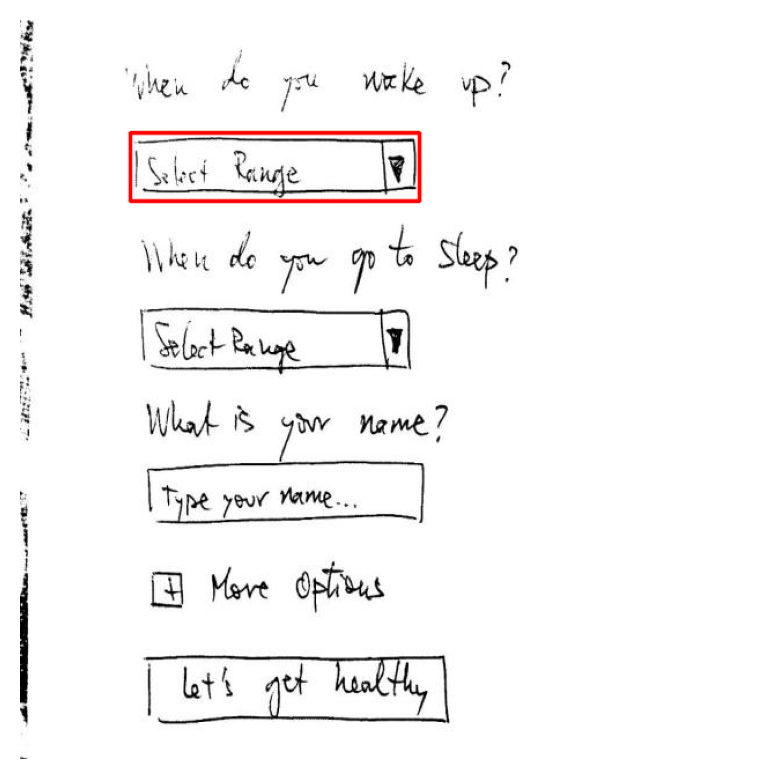

1- 00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg - Select


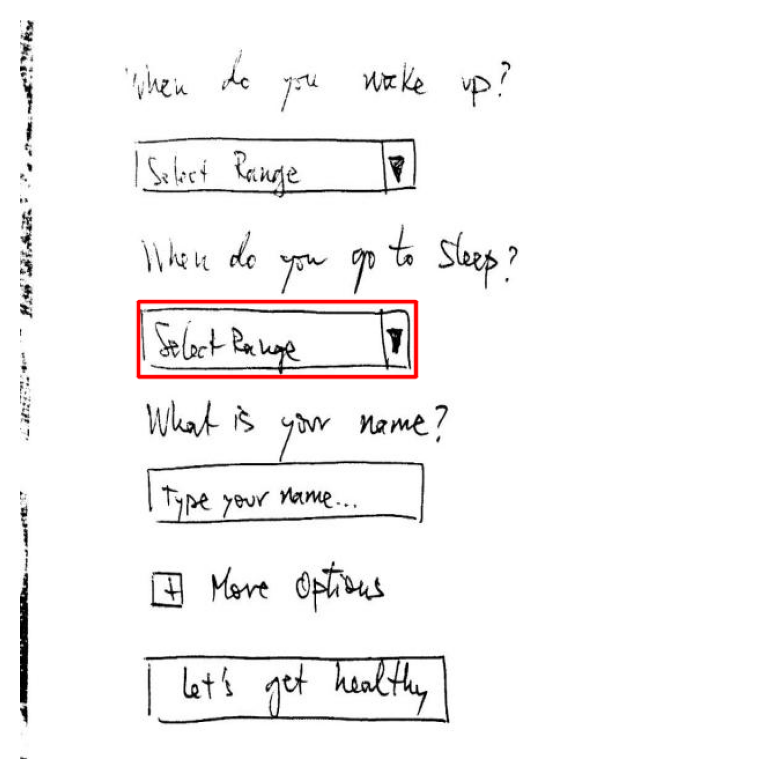

2- 00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg - Button


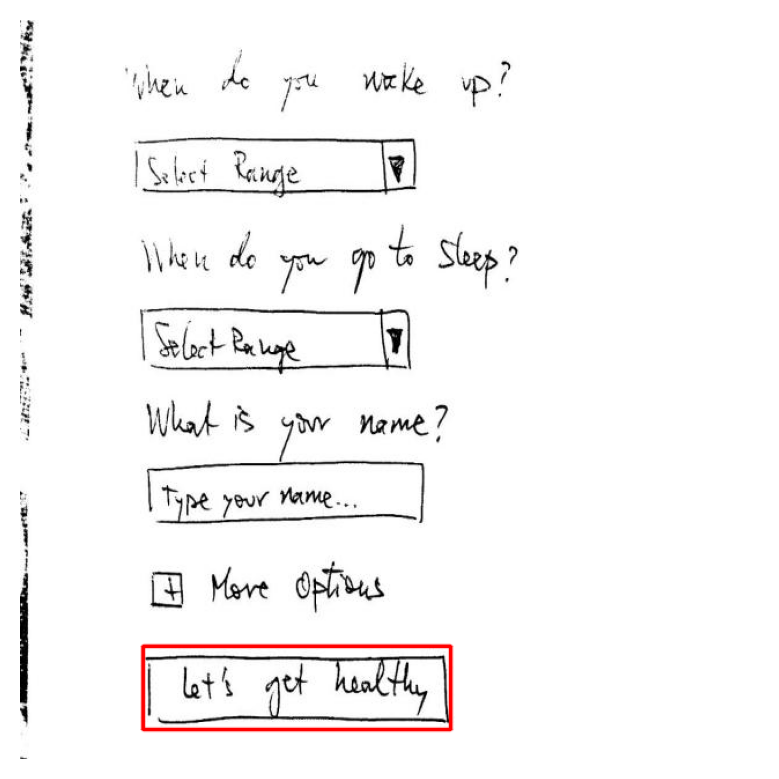

In [19]:



for i in range(3):
    item = new_dataset.iloc[i]
    print(f'{i}- {item.image_name} - {item.class_name}')
    show_detected_objects(item,img_folder='new_dataset/')

# spilt into train and test

In [20]:
from sklearn.model_selection import train_test_split
import shutil


if os.path.exists('train'):
    shutil.rmtree('train')
    
if os.path.exists('test'):
    shutil.rmtree('test')

train_set, test_set = train_test_split(new_dataset, test_size = 0.2, random_state = 42)


In [21]:
train_set

,image_name,width,height,class_name,x_min,y_min,x_max,y_max
1873,image_175_png.rf.6ae413c5ccbc13d1fc6d48c193d66...,640,640,CheckBox,279,118,473,144
3111,00022_png.rf.e130b45ccb36b15451f543f6549ba160.jpg,640,640,Image,56,417,107,504
1837,image_182_png.rf.6a6b8609bedf8aedb3fb4208b3231...,640,640,Paragraph,350,165,581,225
4910,d8583058-613e-4990-8973-5a231de3467b.png,1200,900,RadioButton,157,432,351,490
2680,image_24_png.rf.bbeef022903fc65084371c83e8438c...,640,640,Button,161,115,269,146
...,...,...,...,...,...,...,...,...
4456,image_188_png.rf.c2224e1799eeda9db177cc67e12b0...,640,640,CheckBox,6,236,154,252
5923,ce3baaad-b073-4694-8ae0-1cb1e818c075.png,1200,900,TextBox,194,401,684,495
5958,6475faaf-d427-4a61-a28d-aa781d5bdc91.png,1200,900,TextBox,39,405,530,506
6124,6913aa55-d647-4efc-a1ed-80d790618aa8.png,900,1200,Image,471,473,597,617


In [22]:
test_set

,image_name,width,height,class_name,x_min,y_min,x_max,y_max
2969,image_125_png.rf.c04fbdbbd7fdd4e23290345f85b3e...,640,640,TextBox,12,19,187,48
1986,image_57_png.rf.794b6ed8d92e456785962098e07191...,640,640,Label,385,558,464,579
2821,image_61_png.rf.b75a07f6c7029516b38ab66415c04e...,640,640,Button,161,293,259,321
3809,image_111_png.rf.fd9ef1f877fe81f086b23a7ddb081...,640,640,Heading,216,433,277,452
5364,bdd7286c-6da8-4caa-a7a0-ffcaa7e0ba02.png,783,1600,CheckBox,127,950,672,1081
...,...,...,...,...,...,...,...,...
3210,image_161_png.rf.cfd20b4fe1695e91f26646da22150...,640,640,Link,450,117,531,145
3577,00021_png.rf.f33255cfe99ce33a5b61c360f67a8c58.jpg,640,640,CheckBox,170,382,274,461
1317,image_147_png.rf.4fbaa5c50fd050324077a1f195b09...,640,640,Select,33,470,214,507
6006,3e6baa71-dc1e-4ec8-8a3f-a4349e6cbf1a.png,1200,900,Heading,491,343,714,405


In [23]:
copy2dri(destination='train/',df= train_set,fromDir=[new_dataset_path])


train/


'done'

In [24]:
copy2dri(destination='test/',df= test_set,fromDir=[new_dataset_path])


test/


'done'

# create tf record

In [27]:

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import sys
import pandas as pd
import tensorflow.compat.v1 as tf
# import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util, label_map_util
from collections import namedtuple, OrderedDict

# flags = tf.app.flags
# flags.DEFINE_string('csv_input', '', 'Path to the CSV input')
# flags.DEFINE_string('output_path', '', 'Path to output TFRecord')
# flags.DEFINE_string('image_dir', '', 'Path to images')
# FLAGS = flags.FLAGS

class_map = label_map_util.load_labelmap('label_map.pbtxt')
class_map_dict = label_map_util.get_label_map_dict(class_map)

# print(class_map_dict)



# TO-DO replace this with label map
def class_text_to_int(row_label):
    return class_map_dict[row_label]


def split(df, group):
    data = namedtuple('data', ['image_name', 'object'])
    gb = df.groupby(group)
    return [data(image_name, gb.get_group(x)) for image_name, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.image_name)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)

    width, height = image.size

#     print(encoded_jpg)
    
    image_name = group.image_name.encode('utf8')
#     print(image_name)
    image_format = image.format.encode()
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes_num = []

    for index, row in group.object.iterrows():
#         print(row['x_min'])
        xmins.append(row['x_min'] / width)
        xmaxs.append(row['x_max'] / width)
        ymins.append(row['y_min'] / height)
        ymaxs.append(row['y_max'] / height)
        classes_text.append(row['class_name'].encode('utf8'))
        classes_num.append(class_text_to_int(row['class_name']))
        
#     print(image_format)


    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/image_name': dataset_util.bytes_feature(image_name),
        'image/source_id': dataset_util.bytes_feature(image_name),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/x_min': dataset_util.float_list_feature(xmins),
        'image/object/bbox/x_max': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/y_min': dataset_util.float_list_feature(ymins),
        'image/object/bbox/y_max': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes_num),
    }))
        
    return tf_example


def csv_2_tfrecord(output_path,image_dir,csv_input):
    
    writer = tf.python_io.TFRecordWriter(output_path)
    path = os.path.join(image_dir)
    examples = pd.read_csv(csv_input)
    grouped = split(examples, 'image_name')
#     print(grouped)
    

    # added
    file_errors = 0

    for group in grouped:
        try:
            tf_example = create_tf_example(group, path)
            writer.write(tf_example.SerializeToString())
        except:

            # added
            file_errors += 1
            pass

    writer.close()

    # added
    print("FINISHED. There were %d errors" % file_errors)

    output_path = os.path.join(os.getcwd(), output_path)
    print('Successfully created the TFRecords: {}'.format(output_path))

    
# call
csv_2_tfrecord(csv_input='train/annotations.csv',
              image_dir='train/',
              output_path= 'train.record')

csv_2_tfrecord(csv_input='test/annotations.csv',
              image_dir='test/',
              output_path= 'test.record')





FINISHED. There were 0 errors
Successfully created the TFRecords: /home/uwu/Desktop/sketch web ui dataset/train.record
FINISHED. There were 0 errors
Successfully created the TFRecords: /home/uwu/Desktop/sketch web ui dataset/test.record


In [ ]:
classes